#  XGBoost
- 뛰어난 예측 성능
- GBM 대비 빠른 수행 시간(CPU 병렬처리, GPU지원)

- 다양한 성능 향상 기능 (규제(Regularization)기능 탑재, Tree Pruning: 가지치기, 노드를 모두 만들었다가 다시 한번 검증 -> 트리들이 제대로 작동하는지 노드부터 검증하면서 가지치기를 한다.)

- 다양한 편의 기능

- Light GBM보다는 조금 느려.

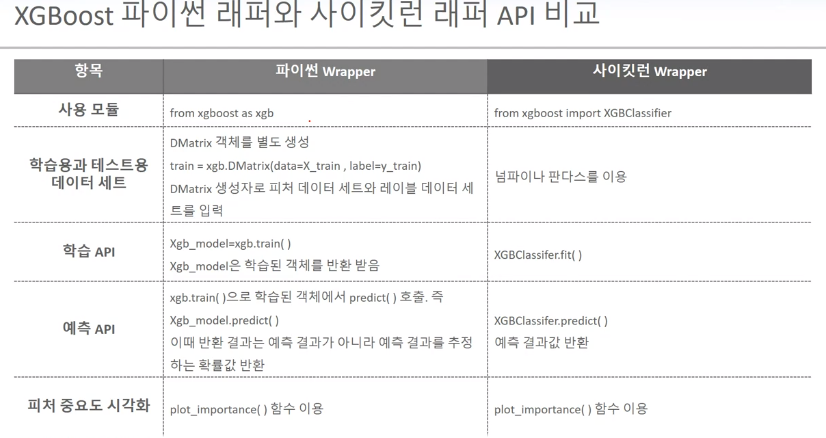

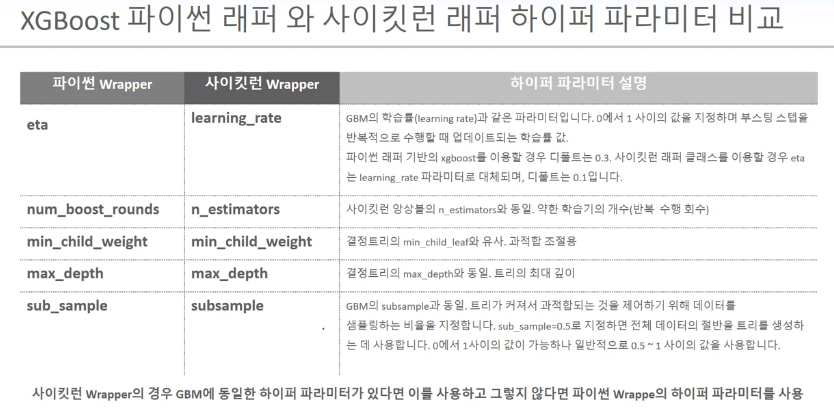

- 부스팅계열들의 파라미터는 너무 오래걸려서 웅앵
- weight값이 특정값을 넘으면 child를 만들거냐 안만들거냐 식으로 규제

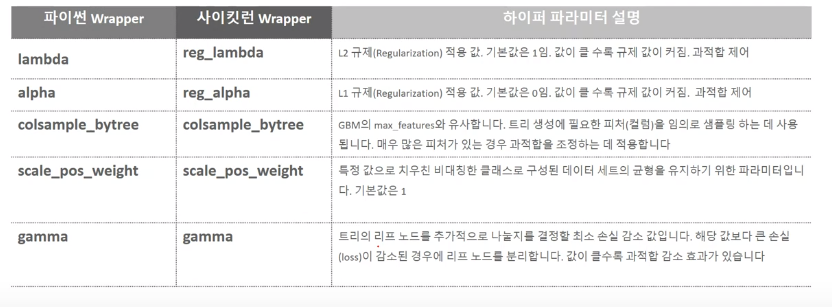

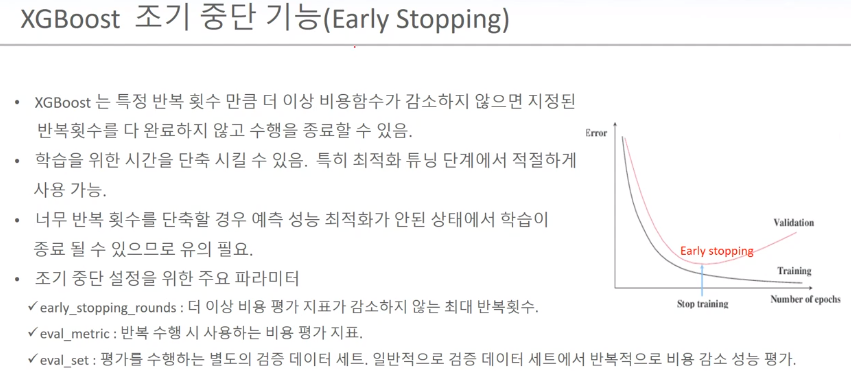

- 어느 수준에서 에러를 줄이는 정도가 안나오면 멈춰버린다



In [6]:
import xgboost

print(xgboost.__version__)

0.90


In [8]:
import xgboost as xgb
from xgboost import plot_importance

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [9]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [10]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )
print(X_train.shape , X_test.shape)

(455, 30) (114, 30)


## 학습과 예측 데이터 세트를 DMatrix로 변환

In [11]:
dtrain = xgb.DMatrix(data=X_train , label=y_train)
dtest = xgb.DMatrix(data=X_test , label=y_test)

In [13]:
# 하이퍼 파라미터 설정

params = { 'max_depth':3,
           'eta': 0.1,
#            'objective':'binary:logistic',
           'eval_metric':'logloss',
           'early_stoppings':100
        }
num_rounds = 400 # 400번 돌린다

In [14]:
# train 데이터 셋은 ‘train’ , evaluation(test) 데이터 셋은 ‘eval’ 로 명기합니다. 
wlist = [(dtrain,'train'),(dtest,'eval') ] # eval : evaluation
# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtrain , num_boost_round=num_rounds , evals=wlist )

[0]	train-logloss:0.606807	eval-logloss:0.609825
[1]	train-logloss:0.535601	eval-logloss:0.542703
[2]	train-logloss:0.476152	eval-logloss:0.486155
[3]	train-logloss:0.425167	eval-logloss:0.439255
[4]	train-logloss:0.381758	eval-logloss:0.399824
[5]	train-logloss:0.34181	eval-logloss:0.364606
[6]	train-logloss:0.307318	eval-logloss:0.333872
[7]	train-logloss:0.277287	eval-logloss:0.307618
[8]	train-logloss:0.251125	eval-logloss:0.284859
[9]	train-logloss:0.227776	eval-logloss:0.263955
[10]	train-logloss:0.207243	eval-logloss:0.245755
[11]	train-logloss:0.189795	eval-logloss:0.22891
[12]	train-logloss:0.173863	eval-logloss:0.214318
[13]	train-logloss:0.159331	eval-logloss:0.202066
[14]	train-logloss:0.14646	eval-logloss:0.190803
[15]	train-logloss:0.135118	eval-logloss:0.180015
[16]	train-logloss:0.124899	eval-logloss:0.170651
[17]	train-logloss:0.115405	eval-logloss:0.162023
[18]	train-logloss:0.106881	eval-logloss:0.154515
[19]	train-logloss:0.099254	eval-logloss:0.148017
[20]	train-lo

[164]	train-logloss:0.0109	eval-logloss:0.089759
[165]	train-logloss:0.010813	eval-logloss:0.089667
[166]	train-logloss:0.010779	eval-logloss:0.089675
[167]	train-logloss:0.010696	eval-logloss:0.08987
[168]	train-logloss:0.010681	eval-logloss:0.089817
[169]	train-logloss:0.010612	eval-logloss:0.089747
[170]	train-logloss:0.010532	eval-logloss:0.08956
[171]	train-logloss:0.010511	eval-logloss:0.089683
[172]	train-logloss:0.010466	eval-logloss:0.089669
[173]	train-logloss:0.01047	eval-logloss:0.089719
[174]	train-logloss:0.010354	eval-logloss:0.089718
[175]	train-logloss:0.010328	eval-logloss:0.089719
[176]	train-logloss:0.010238	eval-logloss:0.089678
[177]	train-logloss:0.010215	eval-logloss:0.089745
[178]	train-logloss:0.010157	eval-logloss:0.089716
[179]	train-logloss:0.010037	eval-logloss:0.08958
[180]	train-logloss:0.010004	eval-logloss:0.089585
[181]	train-logloss:0.009963	eval-logloss:0.089636
[182]	train-logloss:0.009891	eval-logloss:0.08962
[183]	train-logloss:0.009798	eval-logl

[326]	train-logloss:0.004792	eval-logloss:0.091069
[327]	train-logloss:0.004789	eval-logloss:0.091065
[328]	train-logloss:0.004751	eval-logloss:0.091089
[329]	train-logloss:0.004696	eval-logloss:0.091093
[330]	train-logloss:0.004703	eval-logloss:0.091114
[331]	train-logloss:0.004661	eval-logloss:0.091098
[332]	train-logloss:0.004641	eval-logloss:0.091127
[333]	train-logloss:0.00463	eval-logloss:0.091135
[334]	train-logloss:0.004622	eval-logloss:0.091148
[335]	train-logloss:0.004628	eval-logloss:0.09117
[336]	train-logloss:0.004582	eval-logloss:0.091179
[337]	train-logloss:0.00457	eval-logloss:0.091193
[338]	train-logloss:0.004561	eval-logloss:0.091195
[339]	train-logloss:0.004548	eval-logloss:0.091224
[340]	train-logloss:0.004521	eval-logloss:0.091233
[341]	train-logloss:0.004499	eval-logloss:0.091249
[342]	train-logloss:0.004478	eval-logloss:0.091221
[343]	train-logloss:0.004484	eval-logloss:0.091239
[344]	train-logloss:0.004441	eval-logloss:0.091244
[345]	train-logloss:0.004407	eval-

## predict()를 통해 예측 확률값을 반환하고 예측 값으로 변환

In [15]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[ 0.708  0.024  0.64   0.435  0.983  1.014  0.988  1.029  0.98  -0.005]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


## get_clf_eval()을 통해 예측 평가

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [20]:
get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[35  2]
 [ 2 75]]
정확도: 0.9649, 정밀도: 0.9740, 재현율: 0.9740,    F1: 0.9740, AUC:0.9954


## Feature Importance 시각화

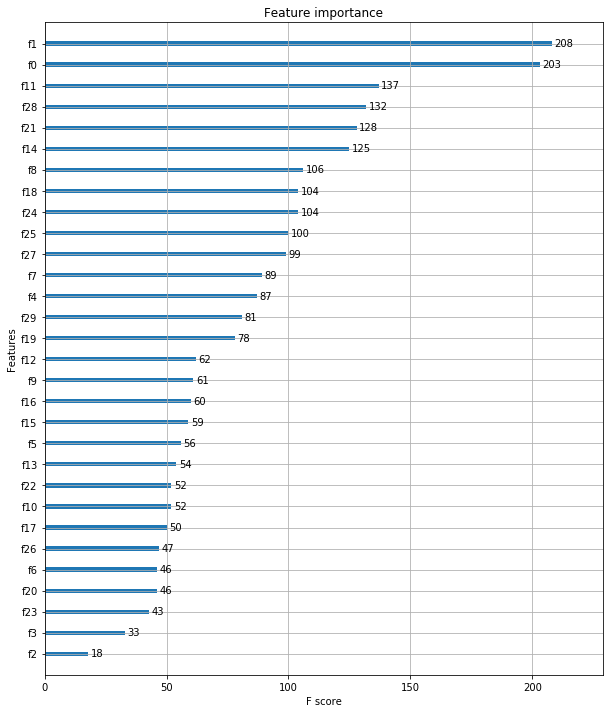

In [21]:

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# subplot을 하면 하위의 축이 반환된다.

plot_importance(xgb_model, ax=ax)

## 사이킷런 Wrapper XGBoost 개요 및 적용

### 사이킷런 래퍼 클래스 임포트, 학습 및 예측

In [23]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

evals = [(X_test, y_test)]
# 원래는 evaluation도 검증(train)데이터로 뽑아야하는데, 데이터가 충분히 작기때문에 test데이터로 돌린다.
# 원래는 이러면 안됑

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train , y_train,  early_stopping_rounds=400,eval_set=evals, eval_metric="logloss",  verbose=True)
# 손실에 대한 평가지표는 logloss로 하겠다

w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 400 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

[230]	validation_0-logloss:0.086002
[231]	validation_0-logloss:0.085922
[232]	validation_0-logloss:0.086102
[233]	validation_0-logloss:0.086115
[234]	validation_0-logloss:0.086169
[235]	validation_0-logloss:0.086263
[236]	validation_0-logloss:0.086292
[237]	validation_0-logloss:0.086217
[238]	validation_0-logloss:0.086395
[239]	validation_0-logloss:0.086342
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.086195
[242]	validation_0-logloss:0.086248
[243]	validation_0-logloss:0.086263
[244]	validation_0-logloss:0.086293
[245]	validation_0-logloss:0.086222
[246]	validation_0-logloss:0.086398
[247]	validation_0-logloss:0.086347
[248]	validation_0-logloss:0.086276
[249]	validation_0-logloss:0.086448
[250]	validation_0-logloss:0.086294
[251]	validation_0-logloss:0.086312
[252]	validation_0-logloss:0.086364
[253]	validation_0-logloss:0.086394
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.086441
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08

In [24]:
get_clf_eval(y_test , w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


## early stopping을 100으로 설정하고 재 학습/예측/평가

In [26]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)

evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

# 보면 211번째의 loss가 가장 최저인데, 311번 돌때까지 loss가 더 나아지지(작아지지)않으므로, 400번까지 학습하지 않고 311번째에서 멈춘다

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

[230]	validation_0-logloss:0.086002
[231]	validation_0-logloss:0.085922
[232]	validation_0-logloss:0.086102
[233]	validation_0-logloss:0.086115
[234]	validation_0-logloss:0.086169
[235]	validation_0-logloss:0.086263
[236]	validation_0-logloss:0.086292
[237]	validation_0-logloss:0.086217
[238]	validation_0-logloss:0.086395
[239]	validation_0-logloss:0.086342
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.086195
[242]	validation_0-logloss:0.086248
[243]	validation_0-logloss:0.086263
[244]	validation_0-logloss:0.086293
[245]	validation_0-logloss:0.086222
[246]	validation_0-logloss:0.086398
[247]	validation_0-logloss:0.086347
[248]	validation_0-logloss:0.086276
[249]	validation_0-logloss:0.086448
[250]	validation_0-logloss:0.086294
[251]	validation_0-logloss:0.086312
[252]	validation_0-logloss:0.086364
[253]	validation_0-logloss:0.086394
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.086441
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08

In [27]:
get_clf_eval(y_test , ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9954


## early wrapping을 10으로 설정하고 재 학습/예측/평가
- 미처 최적화 되기전에 끝나는 문제점이 있지만, 정말 시간이 짧게 학습하고 파라미터를 대충 튜닝할 때 사용

In [28]:
# early_stopping_rounds를 10으로 설정하고 재 학습. 
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, 
                eval_metric="logloss", eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912


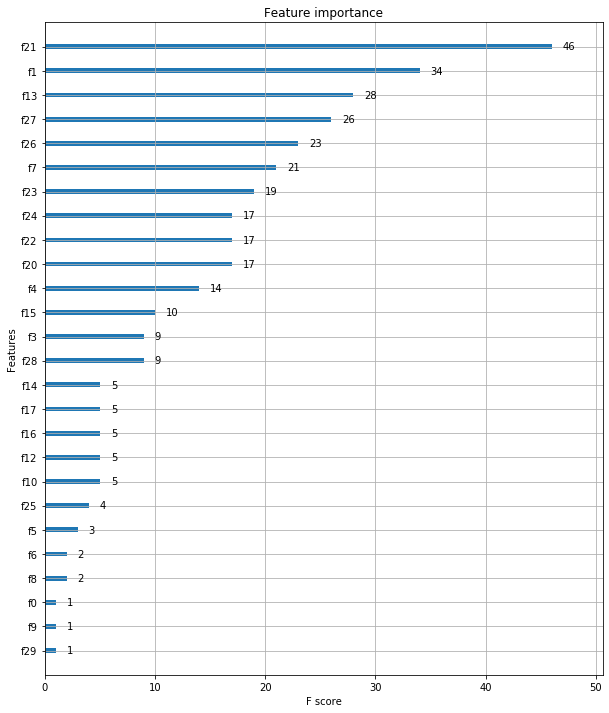

In [29]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb_wrapper, ax=ax)